## Governing Equation for Discretized Water Flow in a Porous Medium

The equation below encapsulates the fundamental mechanisms governing the transient behavior of water flow in a discretized porous medium:

\begin{equation}
\underbrace{\Big[\Phi_{\text{ref}} V \left( \frac{\partial m_\phi(p)}{\partial p} b(p) + m_\phi(p) \frac{\partial b(p)}{\partial p} \right) \frac{dp}{dt} \Big]_i}_{\text{Transient term in block }i, \, \left[\frac{m^3}{s} \right]}
+ \underbrace{\sum_{j \in C(i)} \left[ \left[b(p) \lambda m_T(p) \right]_i T_{ij} (p_{i} - p_{j}) \right]}_{\text{Flow between connected blocks}, \, \left[\frac{m^3}{s} \right]}
+ \underbrace{T_{w,i}M_{i} (p_i - p_{bhp,w})}_{\text{Inflow into well within block }i, \, \left[\frac{m^3}{s} \right]} = 0
\end{equation}


### Initial Conditions

The system initiates with a constant pressure $ p_i = \text{const} $ across all cells $i$.

### Nomenclature with Units
- $ \Phi_{\text{ref,i}} $: Reference porosity in cell $i$, assumed constant. [Dimensionless]
- $ V_i $: Volume of cell $i$, assumed constant. [$m^3$]
- $ m_{\phi,i} $: Pore volume multiplier as a function of pressure in cell $i$. [Dimensionless]
- $ b_i $: Formation volume factor, which relates reservoir volume to surface volume; a function of pressure. [$m^3/m^3$]
- $ C(i) $: Set of cells connected to cell $i$. [Set]
- $ \lambda $: Mobility of the water phase. [$m^2/(Pa \cdot s)$]
- $ m_{T,i} $: Transmissibility multiplier, a function of pressure in cell $i$. [Dimensionless]
- $ T_{ij} $: Transmissibility factor between cells $i$ and $j$. [$m^2/(Pa \cdot s)$]
- $ p_i $: Pressure in cell $i$. [$Pa$]
- $ T_{w,i} $: Transmissibility of the well connection in cell $i$. [$m^2/(Pa \cdot s)$]
- $ M_{i} $: Mobility of the water phase in well connection at cell $i$. [$m^2/(Pa \cdot s)$]
- $ p_{bhp,w} $: Bottomhole pressure of the well, if present. [$Pa$]


### 1. Transient Term in Block $i$

$$
\underbrace{\Big[\Phi_{\text{ref}} V \left( \frac{\partial m_\phi(p)}{\partial p} b(p) + m_\phi(p) \frac{\partial b(p)}{\partial p} \right) \frac{dp}{dt} \Big]_i}_{\text{Transient term in block }i, \, \left[\frac{m^3}{s} \right]}
$$

**Explanation:**

This term captures the change in water volume within a grid block as time progresses. It is termed as the 'transient' term because it accounts for the time-varying accumulation or depletion of water within the cell. Specifically:

- $ \Phi_{\text{ref}} $: Reference porosity defines the initial proportion of the volume in the rock that is occupied by the fluid. It represents the inherent porosity of the rock.
  
- $ V $: Volume of the grid cell. This, in combination with porosity, gives us the total pore volume.

- $ m_\phi(p) $: This is the pore volume multiplier. It gives the change in pore volume due to pressure changes. The derivative $\frac{\partial m_\phi(p)}{\partial p}$ gives the rate of change of this multiplier with respect to pressure, showing how sensitive the pore volume is to pressure changes.

- $ b(p) $: This is the formation volume factor. It tells us how much volume a given amount of water at reservoir conditions would occupy at the surface. Its derivative $\frac{\partial b(p)}{\partial p}$ gives the rate of change of the formation volume factor with pressure.

- $ \frac{dp}{dt} $: This represents the rate of change of pressure with time in the grid block.

Combining these components, this term provides the rate of change of water volume in the grid cell with time, incorporating the effects of porosity, pore volume changes due to pressure, and formation volume factor changes.

---

### 2. Flow Between Connected Blocks

$$
\underbrace{\sum_{j \in C(i)} \left[ \left[b(p) \lambda m_T(p) \right]_i T_{ij} (p_{i} - p_{j}) \right]}_{\text{Flow between connected blocks}, \, \left[\frac{m^3}{s} \right]}
$$

**Explanation:**

This term models the flow of water between neighboring grid blocks. The flow is driven by pressure differences between the blocks and is moderated by the transmissibility between them. Specifically:

- $ \lambda $: This is the mobility of the water phase, which indicates how easily the water can flow. It's a combination of permeability and viscosity.

- $ m_T(p) $: This is the transmissibility multiplier, which can vary with pressure.

- $ T_{ij} $: This represents the transmissibility between blocks $i$ and $j$. It encapsulates the inherent ability of the two blocks to transmit fluid between them based on the properties of the rock and fluid.

- $ (p_{i} - p_{j}) $: The pressure difference between blocks $i$ and $j$. The flow is from a region of higher pressure to a region of lower pressure.

---

### 3. Inflow Into Well Within Block $i$

$$
\underbrace{T_{w,i}M_{i} (p_i - p_{bhp,w})}_{\text{Inflow into well within block }i, \, \left[\frac{m^3}{s} \right]}
$$

**Explanation:**

This term models the inflow (or outflow) of water to (or from) a well that is connected to block $i$. The flow is driven by the pressure difference between the block and the well's bottomhole pressure. Specifically:

- $ T_{w,i} $: Transmissibility of the well connection in block $i$. It represents the capacity of the wellbore in that block to allow fluid flow.

- $ M_{i} $: Mobility of the water phase in the well connection at block $i$.

- $ (p_i - p_{bhp,w}) $: The pressure difference between the grid block $i$ and the bottomhole pressure of the well. The fluid will flow into or out of the well based on this difference.


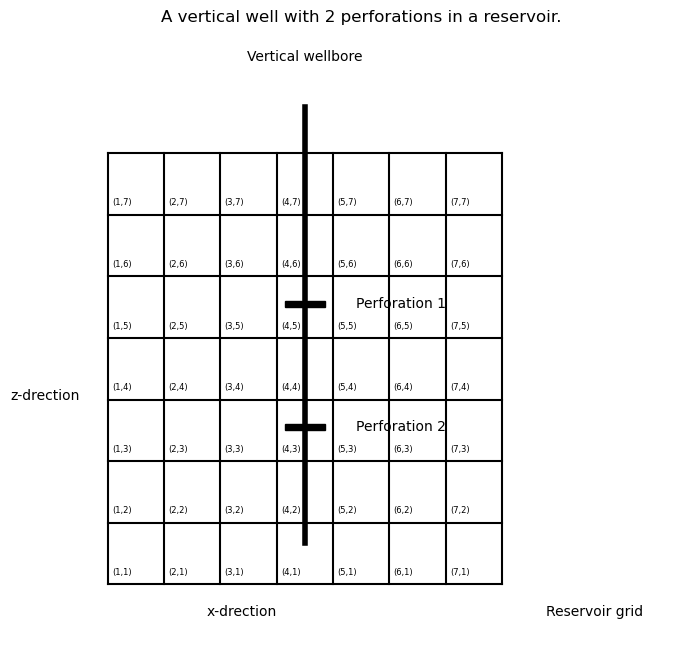

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_reservoir_with_perforations():
    fig, ax = plt.subplots(figsize=(8, 8))

    # Reservoir grid: 7x7
    for i in range(0, 8):  
        # Vertical segments
        ax.plot([i, i], [0, 7], color='k', linestyle='-')
        # Horizontal segments
        ax.plot([0, 7], [i, i], color='k', linestyle='-')

    # Vertical wellbore, adjusted to not overlap with the bulb
    ax.axvline(x=3.5, color='k', lw=4, ymin=1/6, ymax=7/8)

    # Add grid block indices
    for i in range(1, 8):
        for j in range(1, 8):
            ax.text(i-0.75, j-0.8, f'({i},{j})', horizontalalignment='center', verticalalignment='center', fontsize=6)

    # Perforations
    perf_y_coords = [2.5, 4.5]
    perforation_width = 0.7
    for y in perf_y_coords:
        ax.add_patch(patches.Rectangle((3.5 - perforation_width/2, y), perforation_width, 0.1, color='k'))

    # Labels and title
    ax.text(6., 2.5, 'Perforation 2', horizontalalignment='right')
    ax.text(6., 4.5, 'Perforation 1', horizontalalignment='right')
    ax.text(3.5, 8.5, 'Vertical wellbore', horizontalalignment='center')
    ax.text(9.5, -0.5, 'Reservoir grid', horizontalalignment='right')
    ax.text(3, -0.5, 'x-drection', horizontalalignment='right')
    ax.text(-0.5, 3, 'z-drection', horizontalalignment='right')
    
    ax.set_xlim(-1, 10)
    ax.set_ylim(-1, 9)
    ax.axis('off')
    ax.set_title("A vertical well with 2 perforations in a reservoir.")
    
    plt.show()

plot_reservoir_with_perforations()
